Testing

In [1]:
import tensorflow as tf

In [2]:
import os
import numpy as np
import glob
import random
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle


In [3]:
# model_class=tf.keras.models.load_model("class_model.keras")
# model_reg=tf.keras.models.load_model("reg_model.keras")
def custom_loss_function(y_true, y_pred):
    delta_points=tf.reduce_sum(tf.square(y_true[:2]-y_pred[:2]))
    
    h_pred=y_pred[3]-y_pred[1]
    w_pred=y_pred[2]-y_pred[0]
    h_true=y_true[3]-y_true[1]
    w_true=y_true[2]-y_true[0]
    
    delta_size=tf.reduce_sum(tf.square(h_true-h_pred)+tf.square(w_true-w_pred))
    
    return delta_points+delta_size

model=tf.keras.models.load_model("model.keras", custom_objects={"custom_loss_function": custom_loss_function})

In [4]:
path = os.path.join('data','test','images')
work_dir=os.getcwd()
os.chdir(path)

#select all jpeg images
file_names=glob.glob("*.jpg")
for index,file in enumerate(file_names):
    file_names[index]=file.split(".")[0]
    
#go back to orignal directory
os.chdir(work_dir)
file_names[:5]

['6bf0980c-8f75-11ee-9b77-822a25ab1ec7',
 'e7c1ec1a-8f75-11ee-9b77-822a25ab1ec7',
 '704128e0-8f75-11ee-9b77-822a25ab1ec7',
 '6dc4f128-8f75-11ee-9b77-822a25ab1ec7',
 '6e918634-8f75-11ee-9b77-822a25ab1ec7']

In [5]:
#n = no.of files and m = image dimensions 


In [6]:
test_images_path=os.path.join('data','test','images')
n=len(file_names)
m=200*200*3
ind=random.randint(0,n-1)

file = os.path.join(test_images_path,f"{file_names[ind]}.jpg")

img = Image.open(file)

#resize image
newsize = (100, 100)
img = img.resize(newsize)

img = np.asarray(img)
#divide by 255 and reshape to vector
img=img/255
# img=img.reshape(1,-1)

X_test = np.expand_dims(img, axis=0)

In [7]:
X_test.shape

(1, 100, 100, 3)

In [8]:
# y_reg=model_reg.predict(X_test)

In [9]:
y_class,y_reg=model.predict(X_test)

1/1 [==============================] - 0s 151ms/step


In [10]:
points = (y_reg*100).reshape(4,)
points

array([ 2.4060416, 23.823273 , 16.658337 , 80.64844  ], dtype=float32)

Text(0.5, 1.0, 'face')

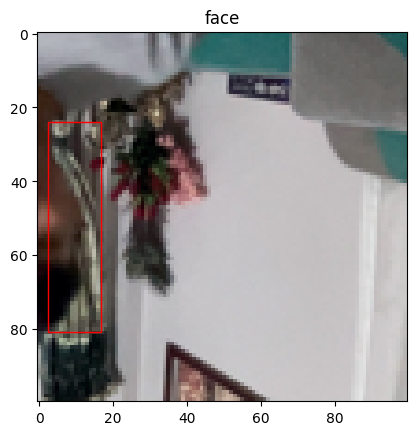

In [11]:
fig,axs=plt.subplots(1,1)
axs.imshow(img.reshape(100,100,3))
tag = "face" if y_class>=0.5 else "no face"
x_min = points[0]
y_min = points[1]
w = points[2] - points[0]
h = points[3] - points[1]
axs.add_patch(Rectangle((x_min, y_min), w, h,
                                      edgecolor='red',
                                      fill=False))
plt.title(tag)